1. Đọc dữ liệu, sau đó hiển thị 5 dòng đầu tiên thông tin về dữ liệu, thống kê mô tả

2. Phân tích khám phá dữ liệu
2.1 Kiểm tra gái trị thiếu
2.2 Vẽ histogram cho tất cả các biến và nhận xét
2.3 Vẽ boxplot cho tất cả các biến và nhận xét
2.4 Vẽ Scattẻplot cho "alcohol" và "quality"

3. Tính toán ma trận tương quan và vẽ heatmap của ma trận tương quan đó

4. Chia tập dữ liệu thủ công không dùng thư viện có sẵn 
4.1 Xáo trộn dữ liệu 
4.2 Chia dữ liệu với 80% huấn luyện 
4.3 Tách dữ liệu 
4.4 Tách đặc trưng và nhãn 

5. Chuẩn bị dữ liệu 
5.1 Khởi tạo bộ dữ liệu chuẩn hóa 
5.2 Chuẩn hóa huấn luyện 
5.3 Chuẩn hóa kiểm tra 

6. Ứng dụng mô hình hồi quy tuyến tính
6.1 khỏi tạo 
6.2 huấn luyện
6.3 dự đoán trên tập kiếm tra 

7. Đánh giá mô hình 

Tính MSE và R^2


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# 1. Đọc dữ liệu, sau đó hiển thị 5 dòng đầu tiên, thông tin về dữ liệu, thống kê mô tả
# Đọc dữ liệu
df = pd.read_csv('winequality-red.csv')
# Hiển thị 5 dòng đầu tiên
df.head(5)

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [3]:
# Thông tin về dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
 #   Column                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                   --------------  ----- 
 0   fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"  1599 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB


In [4]:
# Thống kê mô tả
df.describe() 

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
count,1599
unique,1359
top,7.5;0.51;0.02;1.7;0.084;13;31;0.99538;3.36;0.5...
freq,4


In [5]:
# 2. Phân tích khám phá dữ liệu
# 2.1 Kiểm tra giá trị thiếu
df.isnull().sum()


fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"    0
dtype: int64

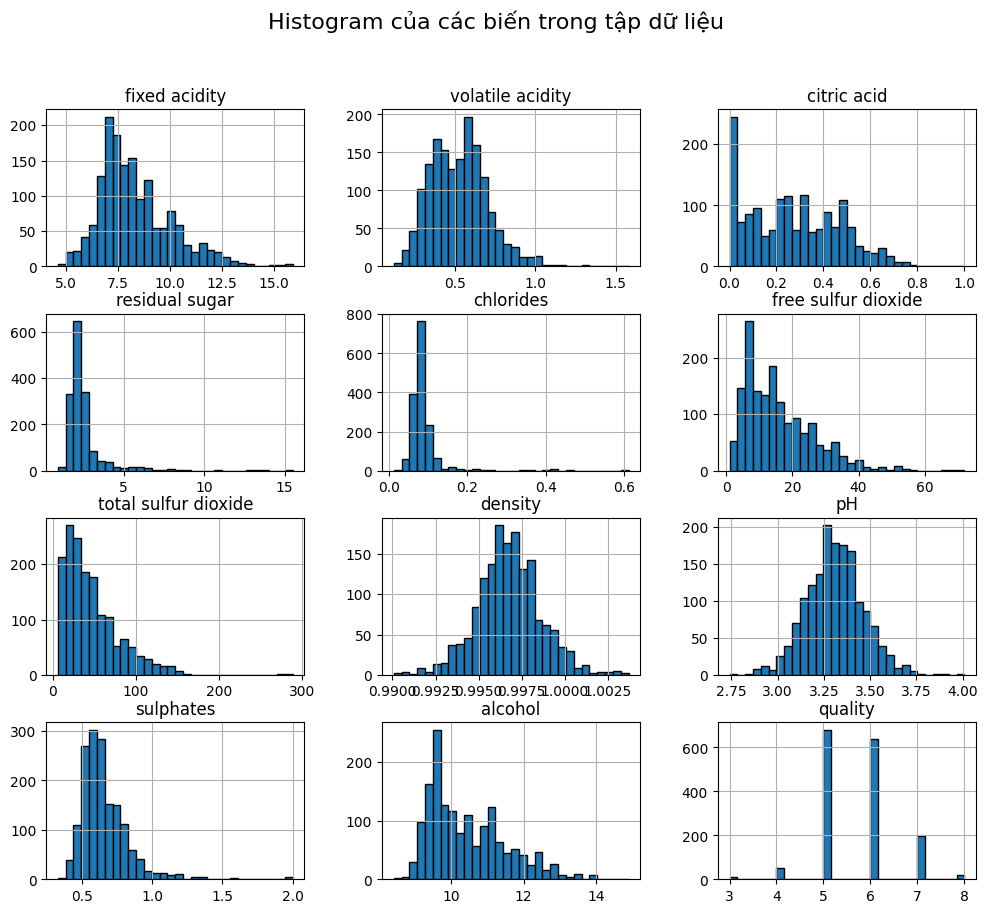

In [6]:
# 2.2 Vẽ histogram cho tất cả các biến và nhận xét
file_path = "winequality-red.csv"
df = pd.read_csv(file_path)
df = pd.read_csv(file_path, delimiter=";")

# Vẽ histogram cho tất cả các biến
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Histogram của các biến trong tập dữ liệu", fontsize=16)
plt.show()

# nhận xét: Nhiều biến như "fixed acidity", ""residual sugar", "free sulfur dioxide", "total sulfur dioxide" có phân phối lệch phải."
# Biến "alcohol" có phân phối gần giống chuẩn.


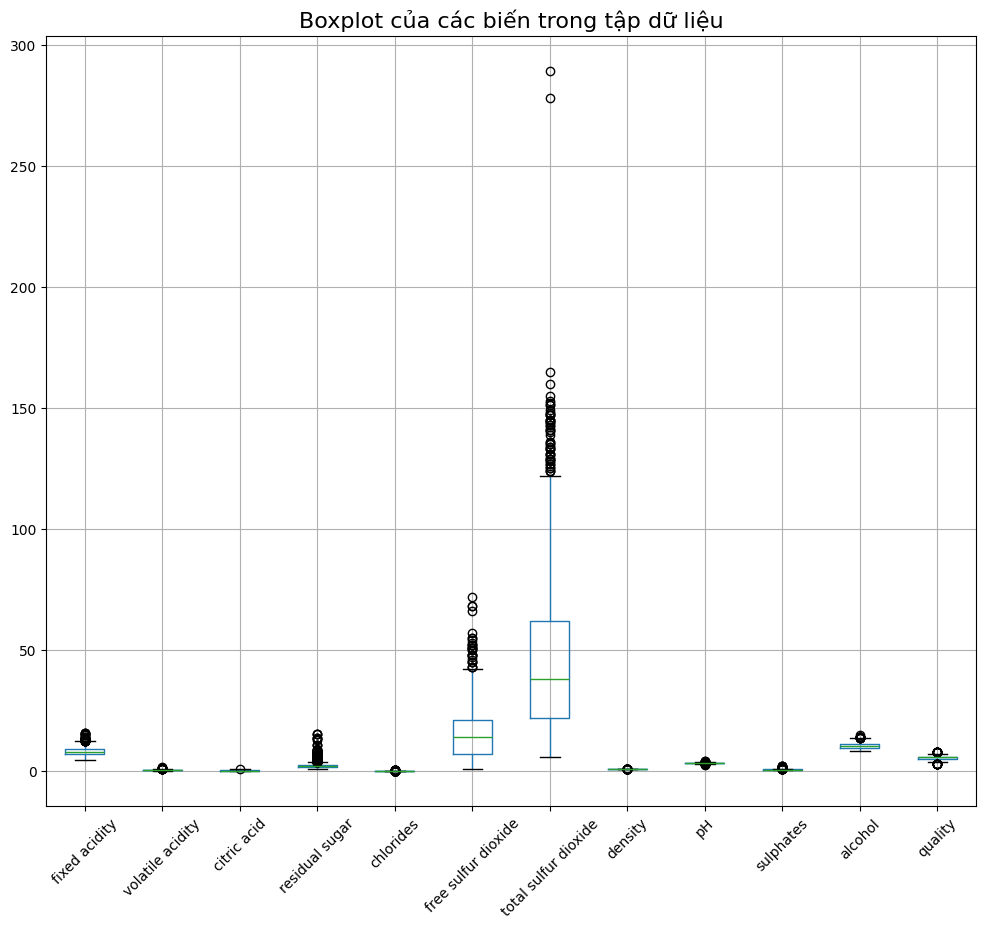

In [7]:
# 2.3 Vẽ boxplot cho tất cả các biến và nhận xét
import seaborn as sns

# Vẽ boxplot cho tất cả các biến
plt.figure(figsize=(12, 10))
df.boxplot(rot=45)
plt.title("Boxplot của các biến trong tập dữ liệu", fontsize=16)
plt.show()

# nhận xét:
# Các biến như "volatile acidity", "residual sugar", "chlorides", "free sulfur dioxide", và "total sulfur dioxide" có nhiều giá trị ngoại lai.
# Một số biến như "density", "pH", và "alcohol" có phân phối khá chặt chẽ mà không có nhiều điểm bất thường.


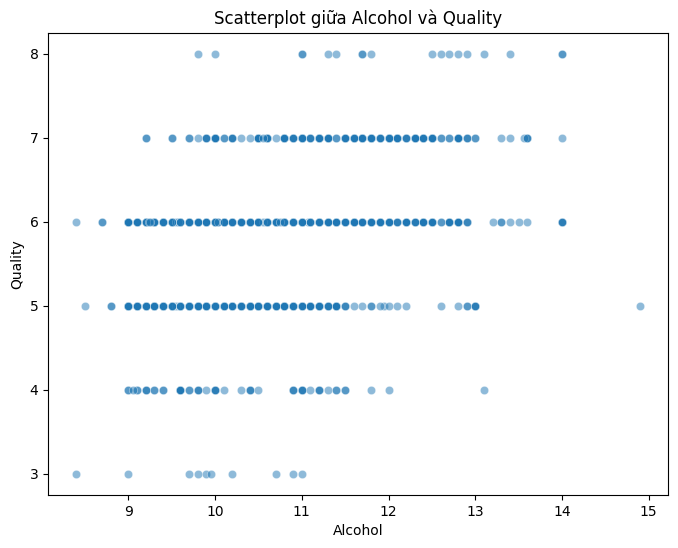

In [8]:
# 2.4 Vẽ Scattẻplot cho "alcohol" và "quality"
# Vẽ scatterplot giữa "alcohol" và "quality"
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["alcohol"], y=df["quality"], alpha=0.5)
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.title("Scatterplot giữa Alcohol và Quality")
plt.show()
# Nhận xét:
# Nhìn chung, khi nồng độ cồn (alcohol) tăng, chất lượng rượu (quality) có xu hướng cao hơn.
# Các giá trị quality chủ yếu nằm trong khoảng từ 3 đến 8, với phần lớn dữ liệu tập trung ở khoảng giữa.

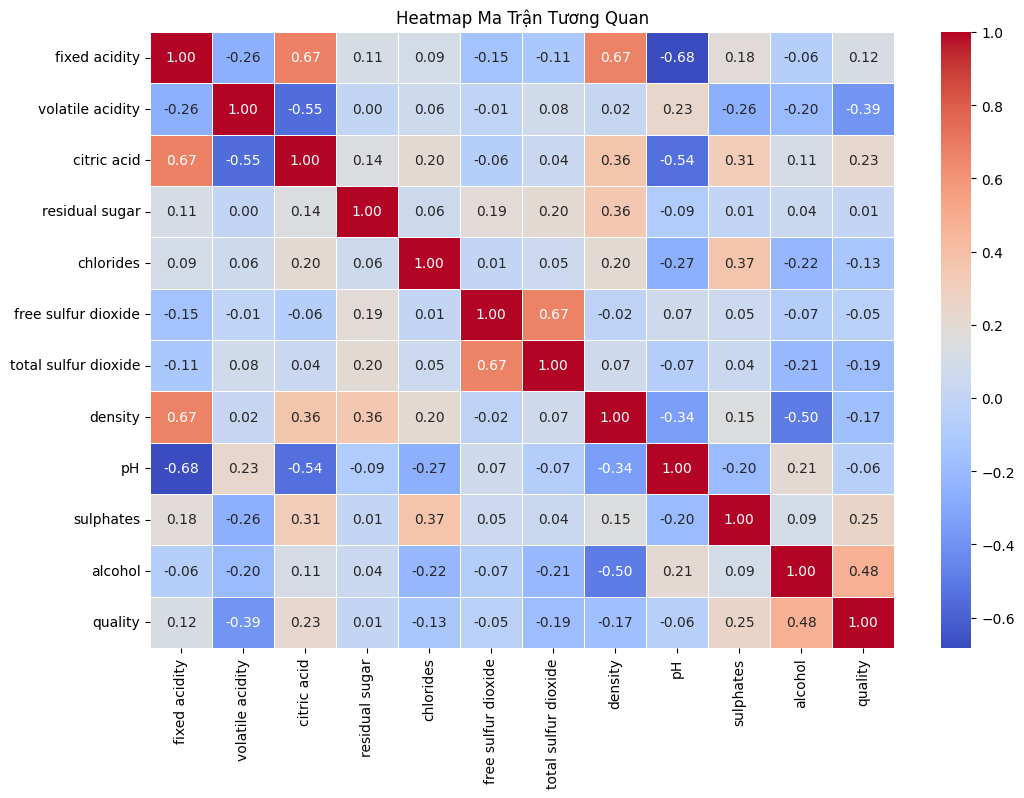

In [9]:
# 3. Tính toán ma trận tương quan và vẽ heatmap của ma trận tương quan đó
# Tính toán ma trận tương quan
corr_matrix = df.corr()

# Vẽ heatmap
plt.figure(figsize=(12, 8))  # Đặt kích thước biểu đồ
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Heatmap Ma Trận Tương Quan")
plt.show()

In [10]:
import numpy as np

# Xáo trộn dữ liệu
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Kiểm tra tên cột có chính xác không
print("Các cột trong DataFrame:", df_shuffled.columns)

# Loại bỏ khoảng trắng nếu có
df_shuffled.columns = df_shuffled.columns.str.strip()

# 4.2 Chia dữ liệu với 80% huấn luyện
train_size = int(0.8 * len(df_shuffled))

# Chia tập dữ liệu
train_data = df_shuffled[:train_size].copy()
test_data = df_shuffled[train_size:].copy()

# Kiểm tra lại sự tồn tại của cột 'quality'
if "quality" not in train_data.columns:
    raise KeyError("Cột 'quality' không tồn tại trong train_data!")
if "quality" not in test_data.columns:
    raise KeyError("Cột 'quality' không tồn tại trong test_data!")

# 4.3 Tách đặc trưng và nhãn
X_train = train_data.drop(columns=["quality"])
y_train = train_data["quality"]

X_test = test_data.drop(columns=["quality"])
y_test = test_data["quality"]

# Kiểm tra kích thước của các tập dữ liệu
print("Kích thước X_train:", X_train.shape)
print("Kích thước X_test:", X_test.shape)
print("Kích thước y_train:", y_train.shape)
print("Kích thước y_test:", y_test.shape)


Các cột trong DataFrame: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Kích thước X_train: (1279, 11)
Kích thước X_test: (320, 11)
Kích thước y_train: (1279,)
Kích thước y_test: (320,)


In [11]:
# 5.
# 5.1
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)



In [12]:
# 6
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [13]:
# 7
from sklearn.metrics import mean_squared_error, r2_score

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)

# Tính toán MSE và R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

f'Mean Squared Error (MSE): {mse}'
f'R-squared (R²): {r2}'


'R-squared (R²): 0.43122792844373636'

BTVN:

1. Hoàn thành bài tập ở trên sao cho đoạn code có thể chạy mượt và chính xác


2. Cho bộ dữ liệu how long we live:
2.1 Có bao nhiêu cột và bao nhiêu hàng
2.2 Danh sách tên của các cột
2.3 Thử dùng df.["status"]
2.4 Có bao nhiêu nước đang phát triển và bao nhiêu nước phát triển
2.5 Tính min, max, mean, median của alcohol 
2.6 
- BT 1: Đếm những hàng có rượu nhiều hơn mức trung bình và liệt kê những quốc giá độc đáo này
- BT 2: Lấy danh sách quốc gia có trình độ học vấn cao hơn mức trung bình và GDP cao hơn mức trung bình


In [14]:
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv("howlongwelive.csv")

# 2.1 Số lượng cột và hàng
num_rows, num_cols = df.shape
print(f"Số hàng: {num_rows}, Số cột: {num_cols}")

# 2.2 Danh sách tên các cột
print("Danh sách cột:", df.columns.tolist())

# 2.3 Truy cập dữ liệu trong cột 'Status'
print("Giá trị duy nhất trong 'Status':", df["Status"].unique())

# 2.4 Đếm số nước phát triển và đang phát triển
developing_count = df[df["Status"] == "Developing"].shape[0]
developed_count = df[df["Status"] == "Developed"].shape[0]
print(f"Số nước đang phát triển: {developing_count}, Số nước phát triển: {developed_count}")

# 2.5 Tính min, max, mean, median của Alcohol
alcohol_stats = df["Alcohol"].describe()[["min", "max", "mean", "50%"]]
print("Thống kê Alcohol:", alcohol_stats)

# BT1: Đếm số hàng có Alcohol cao hơn mức trung bình và liệt kê quốc gia
alcohol_mean = df["Alcohol"].mean()
high_alcohol_countries = df[df["Alcohol"] > alcohol_mean]["Country"].unique()
print("Các quốc gia có mức tiêu thụ rượu cao hơn trung bình:", high_alcohol_countries)

# BT2: Lấy danh sách quốc gia có GDP và trình độ học vấn cao hơn trung bình
gdp_mean = df["GDP"].mean()
schooling_mean = df["Schooling"].mean()
high_gdp_edu_countries = df[(df["GDP"] > gdp_mean) & (df["Schooling"] > schooling_mean)]["Country"].unique()
print("Các quốc gia có GDP và trình độ học vấn cao hơn trung bình:", high_gdp_edu_countries)


Số hàng: 2938, Số cột: 22
Danh sách cột: ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
Giá trị duy nhất trong 'Status': ['Developing' 'Developed']
Số nước đang phát triển: 2426, Số nước phát triển: 512
Thống kê Alcohol: min      0.010000
max     17.870000
mean     4.602861
50%      3.755000
Name: Alcohol, dtype: float64
Các quốc gia có mức tiêu thụ rượu cao hơn trung bình: ['Albania' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Australia'
 'Austria' 'Bahamas' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cameroon' 'Canada' 'Chile' 'China' 'Colombia'
 'Croatia' 'Cyprus' 'Czechia' 'Denmark' 'Dom